In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

### 1.
The probability of rolling 2 ones is : $\frac{1}{6}$ * $\frac{1}{6}$ = $\frac{1}{36}$. <br>
For dice to sum to 7 we have the following pairs: (1,6) (2,5) (3,4) (4,3) (5,2) (6,1) or $\frac{6}{36}$ = $\frac{1}{6}$. <br>
For the ratio of these probabilities: P(two_ones) / P(sum7) = $\frac{1}{36}$ * $\frac{6}{1}$ = $\frac{1}{6}$.

### 2.
If we have sums 2 3 4 5 6 7 8 9 10 11 12 <br>
Combinations for each: <br>
2 : (1,1)                          <br>
3 : (1,2) (2,1)                       <br>
4 : (1,3) (2,2) (3,1)                     <br>
5 : (1,4) (2,3) (3,2) (4,1)               <br>
6 : (1,5) (2,4) (3,3) (4,2) (5,1)               <br>
7 : (1,6) (2,5) (3,4) (4,3) (5,2) (6,1)            <br>
8 : (2,6) (3,5) (4,4) (5,3) (6,2)            <br>
9 : (3,6) (4,5) (5,4) (6,3)             <br>
10: (4,6) (5,5) (6,4)                     <br>
11: (5,6) (6,5)                <br>
12: (6,6)

[0.02777778 0.05555556 0.08333333 0.11111111 0.13888889 0.16666667
 0.13888889 0.11111111 0.08333333 0.05555556 0.02777778]


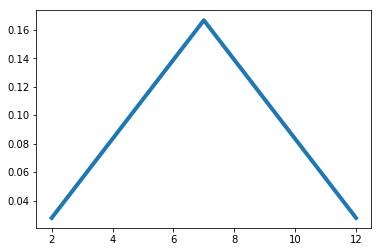

In [2]:
# number 2
sum_prob = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]
sums = [2,3,4,5,6,7,8,9,10,11,12]
a = [1/6,1/6,1/6,1/6,1/6,1/6]

convolve = np.convolve(a,a)
print(convolve)
plt.plot(sums,convolve,linewidth=4);

### 3

In [3]:
# 3
print("The mean is")
print(sum(sums*convolve))

The mean is
7.0


In [4]:
mean = sum(sums*convolve)
x1 = (sums-mean)**2
var = sum(x1*convolve)
print(var)

5.833333333333334


I would say this result makes sense, if we take the standard deviation from the variance, we get around 2.4 or approximately 2. 2 standard deviations from the mean would be close to 12, which means that the probability of getting a 12 sum is low or 2.2% of the total probability.

### 4

The mean is: 3.5002160000000004
The standard deviation is: 0.5397189577400445


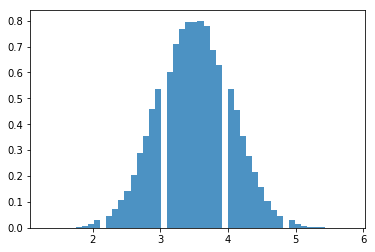

In [5]:
fig, ax = plt.subplots(1,1)
dice = [1,2,3,4,5,6]
r = []
avg_ten = []
for i in range(0,100000):
    values = np.random.randint(1,7,10)
    sum_val = sum(values)
    r.append(sum_val)
    avg_v = r[i] / 10
    avg_ten.append(avg_v)
mu, std = stats.norm.fit(avg_ten)
ax.hist(avg_ten,bins=50,density=True,alpha=.8); 
print("The mean is: {0}".format(mu))
print("The standard deviation is: {0}".format(std))

This distribution is gaussian. We can see that the mean is 3.5, which is the expected value in this case for 1-6. There is also a clear "peak" centered at the mean and the overall shape resembles a gaussian bell curve.

### 5

The mean is: 35.045
The standard deviation is: 5.395273394370298


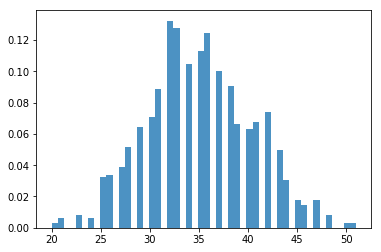

In [6]:
fig, ax = plt.subplots(1,1)
dice = [1,2,3,4,5,6]
r = []
avg_ten = []
for i in range(0,1000):
    values = np.random.randint(1,7,10)
    sum_val = sum(values)
    r.append(sum_val)
    
    
mu, std = stats.norm.fit(r)
ax.hist(r,bins=50,density=True,alpha=.8); 
print("The mean is: {0}".format(mu))
print("The standard deviation is: {0}".format(std))

This is also a gaussian. The standard deviation changes with respect to the variance. So it is different than if the two standard deviations were just added together. For integrating a signal over time, we need to reevaluate the distribution each time as the standard deviation is changing.